<h1> Wine Quality Prediction </h1>

In [21]:
import pandas as pd
import sklearn.linear_model
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.grid_search
%matplotlib inline 

<h1>Data Preprocessing</h1>

In [2]:
data = pd.read_csv('winequality-red.csv', sep=';')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
# We randomize the dataset
data.reindex(np.random.permutation(data.index))

# We split features / labels
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# We normalize X
X = (X - X.mean()) / (X.max() - X.min())

X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382
1,-0.045986,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844
2,-0.045986,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844
3,0.254899,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844
4,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382


<h1>Ordinary Least Square</h1>

In [4]:
ols = sklearn.linear_model.LinearRegression()

In [5]:
# 10-fold cross validation
scores = np.absolute(cross_validation.cross_val_score(ols, X, y, cv=10, scoring='mean_squared_error'))
print('The MSE of the model is: {}'.format(scores.mean()))

The MSE of the model is: 0.43518490403


In [6]:
# Coefficients
ols.fit(X,y)
coefs = pd.DataFrame({'Feature':X.columns, 'Coefficient':ols.coef_})
coefs.loc[len(coefs)] = [ols.intercept_, 'Intercept']
coefs.head(30)

,Coefficient,Feature
0,0.282393,fixed acidity
1,-1.582042,volatile acidity
2,-0.182564,citric acid
3,0.238437,residual sugar
4,-1.122661,chlorides
5,0.309655,free sulfur dioxide
6,-0.923876,total sulfur dioxide
7,-0.243541,density
8,-0.525339,pH
9,1.530278,sulphates


<h1>Ridge Regression</h1>

In [7]:
ridge = sklearn.linear_model.Ridge()

<h3> Hyperparameter Tuning</h3>

Best Hyperparameter:1.84206996933


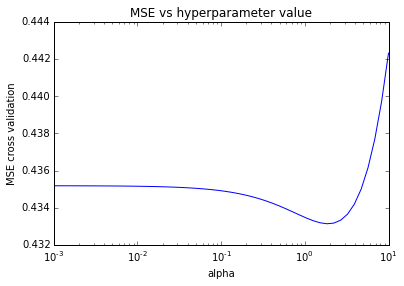

In [8]:
# Hyperparameter: alpha
alphas = np.logspace(-3,1,50)

results = []

for alpha in alphas:
    ridge = sklearn.linear_model.Ridge(alpha)
    score = np.absolute(cross_validation.cross_val_score(ridge, X, y, cv=10, scoring='mean_squared_error')).mean()
    results.append(score)

plt.semilogx(alphas,results)
plt.title('MSE vs hyperparameter value')
plt.ylabel('MSE cross validation')
plt.xlabel('alpha')
    
print('Best Hyperparameter:{}'.format(alphas[np.argmin(results)]))

<h3>Minimum Cross Validation Error (MSE)</h3>

In [9]:
# Minimum cross validation error
print('Minimum cross validation error:{}'.format(min(results)))

Minimum cross validation error:0.433139550654


<h3>Coefficients</h3>

In [10]:
# Coefficients
ridge = sklearn.linear_model.Ridge(1.84)
ridge.fit(X,y)
ridge_coefs = pd.DataFrame({'Feature':X.columns, 'Coefficient':ridge.coef_})
ridge_coefs.loc[len(ridge_coefs)] = [ridge.intercept_, 'Intercept']
ridge_coefs.head(30)

,Coefficient,Feature
0,0.358628,fixed acidity
1,-1.482523,volatile acidity
2,-0.094337,citric acid
3,0.220323,residual sugar
4,-0.878652,chlorides
5,0.245292,free sulfur dioxide
6,-0.803874,total sulfur dioxide
7,-0.336787,density
8,-0.370848,pH
9,1.334249,sulphates


<h1> Lasso Regression</h1>

In [11]:
lasso = ridge = sklearn.linear_model.Lasso()

<h3> Hyperparameter Tuning</h3>

Best Hyperparameter:0.00126485521686


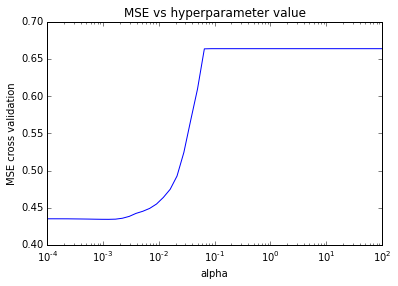

In [12]:
# Hyperparameter: alpha
alphas = np.logspace(-4,2,50)

results = []

for alpha in alphas:
    lasso = sklearn.linear_model.Lasso(alpha)
    score = np.absolute(cross_validation.cross_val_score(lasso, X, y, cv=10,scoring='mean_squared_error')).mean()
    results.append(score)

plt.semilogx(alphas,results)
plt.title('MSE vs hyperparameter value')
plt.ylabel('MSE cross validation')
plt.xlabel('alpha')
    
print('Best Hyperparameter:{}'.format(alphas[np.argmin(results)]))

<h3>Minimum Cross Validation Error (MSE)</h3>

In [13]:
# Minimum cross validation error
print('Minimum cross validation error:{}'.format(min(results)))

Minimum cross validation error:0.434430820535


<h3>Coefficients</h3>

In [14]:
# Coefficients
lasso = sklearn.linear_model.Lasso(0.0013)
lasso.fit(X,y)
lasso_coefs = pd.DataFrame({'Feature':X.columns, 'Coefficient':lasso.coef_})
lasso_coefs.loc[len(lasso_coefs)] = [lasso.intercept_, 'Intercept']
lasso_coefs.head(30)

,Coefficient,Feature
0,0.038627,fixed acidity
1,-1.513524,volatile acidity
2,-0.008535,citric acid
3,0.000000,residual sugar
4,-0.840473,chlorides
5,0.143973,free sulfur dioxide
6,-0.687426,total sulfur dioxide
7,-0.000000,density
8,-0.423917,pH
9,1.271218,sulphates


<h1> First analysis</h1>

<h3>Norm of coefficients:</h3>

In [15]:
print('Norm 2 for OLS:{}, Norm 2 for Ridge:{}'.format(np.linalg.norm(coefs.Coefficient), np.linalg.norm(ridge_coefs.Coefficient)))
print('Norm 1 for OLS:{}, Norm 1 for Lasso:{}'.format(np.linalg.norm(coefs.Coefficient, 1), np.linalg.norm(lasso_coefs.Coefficient, 1)))

Norm 2 for OLS:6.522838991, Norm 2 for Ridge:6.37261662927
Norm 1 for OLS:14.3720940728, Norm 1 for Lasso:12.4457628603


- We can notice that the hyperparameter has a meaningful impact on the norm of the coefficients which is what we expected since the hyperparameter is supposed to reduce the norm of the coefficients and reduce the complexity of the model.
- Furthermore, we can notice that with LASSO, some coefficients are brought to zero which is coherent

<h1>Exterior Derivative Estimation</h1>

In [16]:
class ede():
    def __init__(self, lamb, d):
        self.lamb = lamb
        self.d = d
        self.coef_ = None
        
    def fit(self, X, y):
        X_num = X.values
        n, p = X_num.shape
        X_x = np.concatenate((np.ones((X_num.shape[0], 1)), X_num), axis = 1)

        Cn = X_x.T.dot(X_x)/n
        Rn = X_x.T.dot(y)/n

        S,U=np.linalg.eig(Cn[1:,1:])  
        idx = S.argsort()[::-1]
        S = S[idx]
        U = U[:,idx]

        N_hat=U[:,0:p-self.d-1]
        Pi_x=N_hat.dot(N_hat.T)

        Pn=np.concatenate((np.zeros((1,Pi_x.shape[1])),Pi_x),axis=0)
        Pn = np.concatenate((np.zeros((Pn.shape[0],1)),Pn),axis=1)
        self.coef_ = np.linalg.solve((Cn+self.lamb*Pn),Rn)
        
    def predict(self, X):
        X_num = X.values
        X_x = np.concatenate((np.ones((X_num.shape[0], 1)), X_num), axis = 1)
        return X_x.dot(self.coef_.T)
    
    def get_params(self, deep=True):
        return {'lamb': self.lamb, 'd': self.d}


<h3> Hyperparameter Tuning</h3>

In [17]:
# GridsearchCV
lambdas = np.logspace(-3,1,30)
ds = [1,2,3,4,5,6,7,8,9]

results = {} 
for lamb in lambdas:
    for d in ds:
        ede_model = ede(lamb, d)
        score = np.absolute(cross_validation.cross_val_score(ede_model, X, y, cv=10, scoring='mean_squared_error')).mean()
        results[str((lamb, d))] = score
        
best_params = sorted(results, key=results.__getitem__)

print('Best Hyperparameters Combination (lambda, d): {}'.format(best_params[0]))

Best Hyperparameters Combination (lambda, d): (0.001, 1)


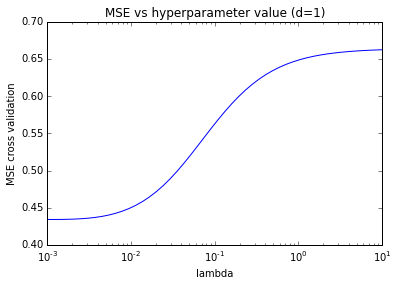

In [18]:
# Plot when d = 1
# Hyperparameter: lambda
lambdas = np.logspace(-3,1,50)

results_d_1 = []

for lamb in lambdas:
    ede_model = ede(lamb, 1)
    score = np.absolute(cross_validation.cross_val_score(ede_model, X, y, cv=10, scoring='mean_squared_error')).mean()
    results_d_1.append(score)

plt.semilogx(lambdas,results_d_1)
plt.title('MSE vs hyperparameter value (d=1)')
plt.ylabel('MSE cross validation')
plt.xlabel('lambda')

<h3>Minimum Cross Validation Error (MSE)</h3>

In [19]:
# Minimum cross validation error

print('Minimum cross validation error:{}'.format(results[best_params[0]]))

Minimum cross validation error:0.434244369666


<h3>Coefficients</h3>

In [20]:
ede_model = ede(0.001, 1)
ede_model.fit(X,y)
col = ['Intercept'] + list(X.columns)
ede_coefs = pd.DataFrame({'Feature':col, 'Coefficient':ede_model.coef_})
ede_coefs.head(30)

,Coefficient,Feature
0,5.636023,Intercept
1,0.224765,fixed acidity
2,-1.430714,volatile acidity
3,-0.049378,citric acid
4,0.208348,residual sugar
5,-1.055728,chlorides
6,0.292124,free sulfur dioxide
7,-0.898875,total sulfur dioxide
8,-0.266097,density
9,-0.478668,pH
